In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from scipy import misc
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)


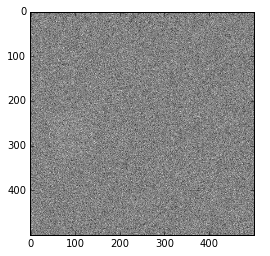

In [69]:
# generate the data
num_frame = 100
sigma = 5
video = make_rotating_square(num_frame, 0.1, 180, sigma)
plt.imshow(video[5], cmap='gray')

# format the data
vec_img = [f.reshape((1, -1)) for f in video]
X = np.concatenate(vec_img,axis = 0)

In [70]:
# apply isomap

n_neighbors = 2
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)

# take only every 10th sample
X_iso = X_iso[1::5]
labels = range(0,num_frame)
labels = labels[1::5]

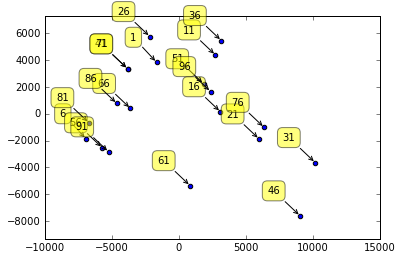

In [71]:
plt.scatter(X_iso[:,0], X_iso[:,1])
plt.axis('equal')
for label, x, y in zip(labels, X_iso[:, 0], X_iso[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
